In [7]:
import sys
sys.path.append('../') # Change path
from Functions import * 
import copy

In [8]:
# Matrix Y, containing all possilbe edges
Y = [[1, 1, 2],
     [-1, 3, 1],
     [-1, 1, 4],
     [1, 2, 3],
     [1, 2, 4],
     [1, 3, 4]]

In [47]:
# Define mu and cov_matrix to be able to sample #num_samples samples from a multivariate normal distribution
dim = 2
mu = np.zeros(dim) 
identity_matrix = np.eye(dim) 
num_samples = 4  


points = {l+1: np.random.multivariate_normal(mu, identity_matrix) for l in range(num_samples)} 

In [98]:
%store points
points_copy = copy.deepcopy(points)

Stored 'points' (dict)


In [99]:
# Adding stopping criteria
prev_grad = 200 
grad = 0
k = 0
n = 100000
MLL = np.zeros(n) # Define the MLL
grad_sum = np.zeros(n) # Define the gradient sum
alpha = 1

while abs(prev_grad - grad) > 0.001: # stopping criteria
    prev_grad = grad
    for i in range(1,num_samples+1): # Run over number of num_samples
        grad_sum[k] += np.sum(Gradient_function_fast(i,2,Y,points_copy,alpha)**2)
        points_copy[i] += LR(k)*Gradient_function_fast(i,2,Y,points_copy,alpha) # Use Gradient_function and take step=0.1*grad
    grad = grad_sum[k]
    MLL[k] = Loss_function_fast(points_copy,Y,alpha) # Calcualte the probability using Loss_function
    k += 1

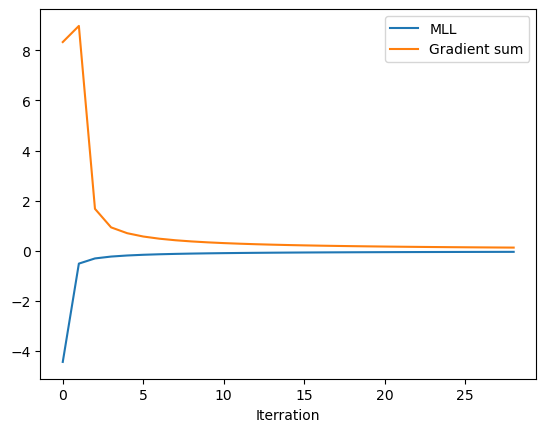

In [32]:
plt.plot(MLL[0:k],label='MLL')
plt.plot(np.sqrt(grad_sum[0:k]), label='Gradient sum')
#plt.ylabel('MLL')
plt.xlabel('Iterration')
plt.legend()
plt.show()

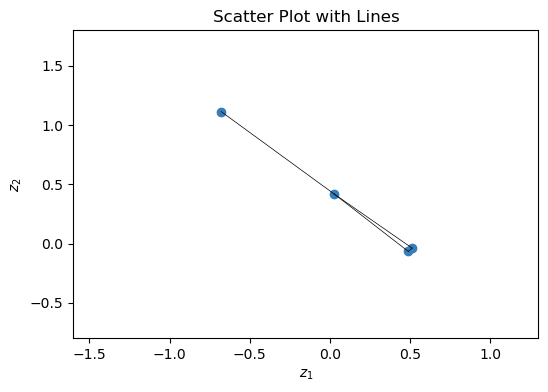

In [100]:
plt.figure(figsize=(6, 4))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points_copy[Y[m][1]]
        point2 = points_copy[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points_copy.values()]
y = [point[1] for point in points_copy.values()]
plt.scatter(x, y, color='#377eb8')

plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.xlim(-1.6, 1.3)
plt.ylim(-0.8, 1.8)
plt.title('Scatter Plot with Lines')
#plt.grid(True)
plt.show()